<a href="https://colab.research.google.com/github/paruliansaragi/DL-Notebooks/blob/master/IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

1.10.1


In [0]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


In [0]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


In [0]:
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [0]:
# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [0]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [0]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [0]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [0]:
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [0]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 70us/step - loss: 0.6929 - acc: 0.5143 - val_loss: 0.6921 - val_acc: 0.5218
Epoch 2/40
15000/15000 [==============================] - 1s 59us/step - loss: 0.6909 - acc: 0.5471 - val_loss: 0.6899 - val_acc: 0.5573
Epoch 3/40
15000/15000 [==============================] - 1s 59us/step - loss: 0.6882 - acc: 0.5799 - val_loss: 0.6873 - val_acc: 0.5943
Epoch 4/40
15000/15000 [==============================] - 1s 59us/step - loss: 0.6844 - acc: 0.6250 - val_loss: 0.6847 - val_acc: 0.5280
Epoch 5/40
15000/15000 [==============================] - 1s 59us/step - loss: 0.6799 - acc: 0.6735 - val_loss: 0.6786 - val_acc: 0.6959
Epoch 6/40
15000/15000 [==============================] - 1s 57us/step - loss: 0.6735 - acc: 0.7141 - val_loss: 0.6719 - val_acc: 0.6976
Epoch 7/40
15000/15000 [==============================] - 1s 60us/step - loss: 0.6651 - acc: 0.7235 - val_loss: 0.6635 - val_acc

In [0]:
results = model.evaluate(test_data, test_labels)

print(results)

25000/25000 [==============================] - 1s 30us/step
[0.3076138269424438, 0.87468]


In [0]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

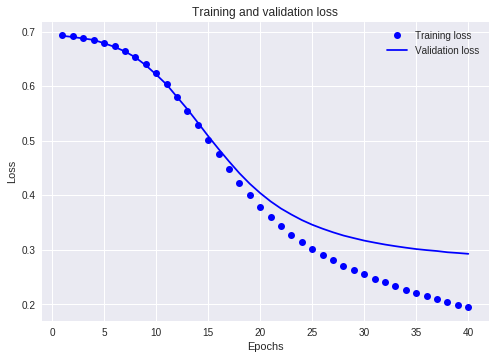

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

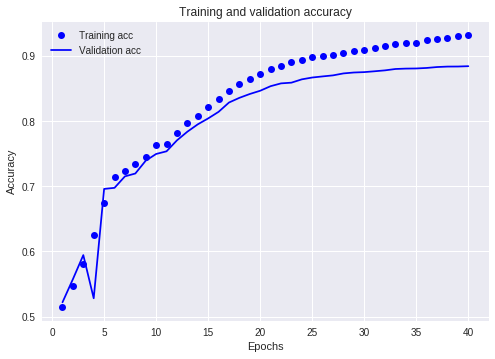

In [0]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [0]:
!pip install fastai

    100% |████████████████████████████████| 122kB 3.9MB/s 
    100% |████████████████████████████████| 1.5MB 8.1MB/s 
    100% |████████████████████████████████| 51kB 16.0MB/s 
    100% |████████████████████████████████| 61kB 12.2MB/s 
    100% |████████████████████████████████| 496.4MB 37kB/s 
    100% |████████████████████████████████| 2.2MB 2.5MB/s 
    100% |████████████████████████████████| 184kB 22.8MB/s 
    100% |████████████████████████████████| 112kB 27.2MB/s 
    100% |████████████████████████████████| 3.6MB 1.5MB/s 
    100% |████████████████████████████████| 11.6MB 675kB/s 
    100% |████████████████████████████████| 92kB 17.1MB/s 
    100% |████████████████████████████████| 901kB 2.9MB/s 
    100% |████████████████████████████████| 71kB 13.9MB/s 
    100% |████████████████████████████████| 112kB 19.4MB/s 
    100% |████████████████████████████████| 15.8MB 2.2MB/s 
    100% |████████████████████████████████| 4.4MB 565kB/s 
    100% |████████████████████████████████| 1.5MB 

In [0]:
!python -m spacy download en

    100% |████████████████████████████████| 37.4MB 22.2MB/s 
  Running setup.py install for en-core-web-sm ... - \ | done

    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en

    You can now load the model via spacy.load('en')



In [0]:
import spacy

spacy_tok = spacy.load('en')

In [0]:
(fast_train_data, fast_train_labels), (fast_test_data, fast_test_labels) = imdb.load_data(num_words=10000)

In [0]:
decode_review(fast_test_data[1000])

"<START> <UNK> this is one of the worst movies i have ever seen the <UNK> for the film is better than the film itself my girlfriend and i watched it this past weekend and we only continued to watch it in the hopes that it would get better it didn't br br the picture quality is poor it looks like it was shot on video and transferred to film the lighting is not great which makes it harder to read the actors' facial expressions the acting itself was cheesy but i guess it's acceptable for yet another teenage horror flick the sound was a huge problem sometimes you have to <UNK> the video because the sound is unclear and or <UNK> br br it holds no real merit of it's own trying to ride on the <UNK> of sleepy hollow don't bother with this one"

In [0]:
' '.join([sent.string.strip() for sent in spacy_tok(fast_train_data[0])])

In [0]:

from fastai.learner import *

import torchtext
from torchtext import vocab, data
from torchtext.datasets import language_modeling

from fastai.rnn_reg import *
from fastai.rnn_train import *
from fastai.nlp import *
from fastai.lm_rnn import *

import dill as pickle

In [0]:
bs=64; bptt=70
PATH = '.'
TEXT = data.Field(lower=True, tokenize="spacy")

In [0]:
md = LanguageModelData.from_text_files(PATH, TEXT, **FILES, bs=bs, bptt=bptt, min_freq=10)

In [0]:
opt_fn = partial(optim.Adam, betas=(0.7, 0.99))
em_sz = 200  # size of each embedding vector
nh = 500     # number of hidden activations per layer
nl = 3       # number of layers
learner = md.get_model(opt_fn, em_sz, nh, nl,
               dropouti=0.05, dropout=0.05, wdrop=0.1, dropoute=0.02, dropouth=0.05)
learner.reg_fn = partial(seq2seq_reg, alpha=2, beta=1)
learner.clip=0.3

In [0]:
#~~~~~TODO~~~~